In [4]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '9b172e04-a7c4-4cec-b39b-841932903ffe',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

{'status': {'timestamp': '2024-02-12T10:19:40.458Z', 'error_code': 0, 'error_message': None, 'elapsed': 11, 'credit_count': 1, 'notice': None, 'total_count': 8799}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10816, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [5]:
type(data)

dict

In [6]:
import pandas as pd

#To display the max column in the table
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)

#This normalize the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])

df['timestamp'] = pd.to_datetime('now')

df

C:\Users\Kahkeshan\AppData\Local\Temp\ipykernel_21412\3474356023.py:10: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10816,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.962571e+07,1.962571e+07,False,NaN,1,NaN,NaN,None,2024-02-12T10:18:00.000Z,48010.294259,2.033676e+10,6.9811,-0.140350,-0.366605,11.214264,12.282273,12.045677,31.509816,9.422359e+11,52.5700,1.008216e+12,None,2024-02-12T10:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-12 10:27:45.056996
1,1027,Ethereum,ETH,ethereum,8400,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201700e+08,1.201700e+08,True,NaN,2,NaN,NaN,None,2024-02-12T10:18:00.000Z,2483.795942,7.096631e+09,-2.7556,-0.165637,-1.566206,6.852520,-1.718867,8.951944,21.313129,2.984778e+11,16.6529,2.984778e+11,None,2024-02-12T10:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-12 10:27:45.056996
2,825,Tether USDt,USDT,tether,74527,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.647514e+10,9.960063e+10,True,NaN,3,NaN,NaN,None,2024-02-12T10:17:00.000Z,0.999962,3.210857e+10,3.7466,-0.009850,-0.043754,0.085579,0.009257,-0.023678,-0.029449,9.647150e+10,5.3824,9.959688e+10,None,2024-02-12T10:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-12 10:27:45.056996
3,1839,BNB,BNB,bnb,2060,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495453e+08,1.495453e+08,False,NaN,4,NaN,NaN,None,2024-02-12T10:17:00.000Z,317.073318,7.340659e+08,0.1842,-0.175383,-1.951243,4.477839,6.298677,25.561284,29.207799,4.741681e+10,2.6455,4.741681e+10,None,2024-02-12T10:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-12 10:27:45.056996
4,5426,Solana,SOL,solana,625,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.373104e+08,5.693764e+08,True,NaN,5,NaN,NaN,None,2024-02-12T10:18:00.000Z,105.173888,1.546561e+09,6.2989,-0.401133,-4.554982,7.535242,14.453151,45.147053,93.553971,4.599363e+10,2.5661,5.988353e+10,None,2024-02-12T10:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-12 10:27:45.056996
5,52,XRP,XRP,xrp,1227,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.450697e+10,9.998791e+10,False,NaN,6,NaN,NaN,None,2024-02-12T10:18:00.000Z,0.518756,7.628141e+08,7.8298,-0.143146,-2.759205,2.668735,-9.263255,-17.644851,-20.692003,2.827580e+10,1.5776,5.187556e+10,None,2024-02-12T10:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-12 10:27:45.056996
6,3408,USDC,USDC,usd-coin,16658,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.783838e+10,2.783838e+10,False,NaN,7,NaN,NaN,None,2024-02-12T10:18:00.000Z,0.999885,4.076015e+09,-1.8181,-0.011993,-0.016210,-0.020381,-0.018213,-0.018830,-0.014606,2.783518e+10,1.5530,2.783518e+10,None,2024-02-12T10:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-12 10:27:45.056996
7,2010,Cardano,ADA,cardano,1068,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.544379e+10,3.661393e+10,False,NaN,8,NaN,NaN,None,2024-02-12T10:17:00.000Z,0.535155,3.676320e+08,-29.5062,-0.371349,-3.662006,6.438761,-2.271393,-17.277576,47.306684,1.896790e+10,1.0583,2.408195e+10,None,2024-02-12T10:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-12 10:27:45.056996
8,5805,Avalanche,AVAX,avalanche,661,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p..."

In [7]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '9b172e04-a7c4-4cec-b39b-841932903ffe',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
#       print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    #NOTE:
    # I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
    # Into the Anaconda Prompt to change this to allow to pull data  

    #This normalize the data and makes it all pretty in a dataframe
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'D:\DA\Python\API\API.csv'):
        df.to_csv(r'D:\DA\Python\API\API.csv', header='column_names')
    else:
        df.to_csv(r'D:\DA\Python\API\API.csv', mode='a', header=False)


In [8]:
import os
from time import time
from time import sleep

for i in range(333): # The limit given in the crypto api account is 333
    api_runner()
    print('API Runner Completed')
    sleep(60) # Sleep for 1 minute
exit()

C:\Users\Kahkeshan\AppData\Local\Temp\ipykernel_21412\393562395.py:29: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner Completed


C:\Users\Kahkeshan\AppData\Local\Temp\ipykernel_21412\393562395.py:29: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner Completed


KeyboardInterrupt: 

In [9]:
df = pd.read_csv(r'D:\DA\Python\API\API.csv')

In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10816,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19625425.00000,19625425.00000,False,NaN,1,NaN,NaN,NaN,2024-02-12T05:29:00.000Z,48190.78578,19254920871.81103,5.09490,0.14260,-0.24267,13.09340,12.22468,12.61969,31.76117,945764652060.51477,52.53360,1012006501427.14001,NaN,2024-02-12T05:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-12 05:38:46.104048
1,1,1027,Ethereum,ETH,ethereum,8397,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120169997.44294,120169997.44294,True,NaN,2,NaN,NaN,NaN,2024-02-12T05:29:00.000Z,2499.87543,6934344794.45306,-2.41870,-0.05569,-1.01715,9.25598,-1.82433,10.61635,21.41879,300410023589.72644,16.68660,300410023589.72998,NaN,2024-02-12T05:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-12 05:38:46.104048
2,2,825,Tether USDt,USDT,tether,74514,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,96475135177.57816,99600626148.96388,True,NaN,3,NaN,NaN,NaN,2024-02-12T05:28:00.000Z,1.00033,31490490560.60504,4.74630,0.00364,-0.00055,0.11742,0.05750,0.01995,0.00228,96506903592.54794,5.36060,99633423760.67000,NaN,2024-02-12T05:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-12 05:38:46.104048
3,3,1839,BNB,BNB,bnb,2060,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149545289.24968,149545289.24968,False,NaN,4,NaN,NaN,NaN,2024-02-12T05:28:00.000Z,320.14878,712799865.42215,-3.72480,0.06272,-1.02983,6.06175,7.57056,28.28320,31.55702,47876742336.59356,2.65940,47876742336.59000,NaN,2024-02-12T05:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-12 05:38:46.104048
4,4,5426,Solana,SOL,solana,625,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,437310891.36632,569376958.78811,True,NaN,5,NaN,NaN,NaN,2024-02-12T05:29:00.000Z,105.88036,1523693846.82276,-4.39820,-0.04442,-3.10767,10.41581,14.87944,49.52305,94.60498,46302636119.82624,2.57190,60285839338.25000,NaN,2024-02-12T05:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-12 05:38:46.104048
5,5,52,XRP,XRP,xrp,1227,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,54506969135.00000,99987912526.00000,False,NaN,6,NaN,NaN,NaN,2024-02-12T05:29:00.000Z,0.52171,750854504.17541,22.15530,-0.25358,-1.16333,3.49231,-9.25704,-16.65010,-21.54403,28436945067.88725,1.57960,52171209515.35000,NaN,2024-02-12T05:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-12 05:38:46.104048
6,6,3408,USDC,USDC,usd-coin,16656,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,27922548984.26410,27922548984.26410,False,NaN,7,NaN,NaN,NaN,2024-02-12T05:29:00.000Z,0.99999,4093636020.98301,6.88680,-0.00471,0.00345,-0.01749,-0.01509,-0.00099,0.00088,27922224879.76123,1.55110,27922224879.76000,NaN,2024-02-12T05:29:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-12 05:38:46.104048
7,7,2010,Cardano,ADA,cardano,1068,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35442797280.23800,36613928911.92100,False,NaN,8,NaN,NaN,NaN,2024-02-12T05:28:00.000Z,0.53792,430786155.40455,-10.39510,-0.12075,-4.17570,8.50732,-1.93743,-17.58159,48.94300,19065513882.65387,1.05900,24206557906.13000,NaN,2024-02-12T05:28:

In [11]:
df3 = df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3 # Type will be df

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.04766,-0.32263,12.33940,12.09419,12.30567,31.56370
Ethereum,-0.15892,-1.28560,8.27805,-1.97512,9.84268,21.27797
Tether USDt,-0.00704,-0.01697,0.11043,0.03520,0.00145,-0.00672
BNB,-0.09858,-1.49211,5.39030,6.92933,27.08802,30.49128
Solana,-0.21254,-3.66503,9.42691,14.58097,47.62940,94.17016
XRP,-0.20247,-1.89189,3.22926,-9.38341,-17.11037,-21.32842
USDC,-0.00924,0.00877,-0.00401,-0.00703,-0.00005,0.00166
Cardano,-0.23293,-4.03423,7.74171,-2.12913,-17.35772,48.21051
Avalanche,0.03026,-4.15977,10.89937,8.59148,0.92865,129.85180


In [12]:
df4 = df3.stack()
df4 # type will be series

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.04766
             quote.USD.percent_change_24h    -0.32263
             quote.USD.percent_change_7d     12.33940
             quote.USD.percent_change_30d    12.09419
             quote.USD.percent_change_60d    12.30567
             quote.USD.percent_change_90d    31.56370
Ethereum     quote.USD.percent_change_1h     -0.15892
             quote.USD.percent_change_24h    -1.28560
             quote.USD.percent_change_7d      8.27805
             quote.USD.percent_change_30d    -1.97512
             quote.USD.percent_change_60d     9.84268
             quote.USD.percent_change_90d    21.27797
Tether USDt  quote.USD.percent_change_1h     -0.00704
             quote.USD.percent_change_24h    -0.01697
             quote.USD.percent_change_7d      0.11043
             quote.USD.percent_change_30d     0.03520
             quote.USD.percent_change_60d     0.00145
             quote.USD.percent_change_90

In [13]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.04766
            quote.USD.percent_change_24h  -0.32263
            quote.USD.percent_change_7d   12.33940
            quote.USD.percent_change_30d  12.09419
            quote.USD.percent_change_60d  12.30567
            quote.USD.percent_change_90d  31.56370
Ethereum    quote.USD.percent_change_1h   -0.15892
            quote.USD.percent_change_24h  -1.28560
            quote.USD.percent_change_7d    8.27805
            quote.USD.percent_change_30d  -1.97512
            quote.USD.percent_change_60d   9.84268
            quote.USD.percent_change_90d  21.27797
Tether USDt quote.USD.percent_change_1h   -0.00704
            quote.USD.percent_change_24h  -0.01697
            quote.USD.percent_change_7d    0.11043
            quote.USD.percent_change_30d   0.03520
            quote.USD.percent_change_60d   0.00145
            quote.USD.percent_change_90d  -0.00672
BNB         quote.USD.percent_change_1h   -0.09858
            quote.USD.percent_change_24h  -1.49211
            quote.USD.percent_change_7d    5.39030
            quote.USD.percent_change_30d   6.92933
            quote.USD.percent_change_60d  27.08802
            quote.USD.percent_change_90d  30.49128
Solana      quote.USD.percent_change_1h   -0.21254
            quote.USD.percent_change_24h  -3.66503
            quote.USD.percent_change_7d    9.42691
            quote.USD.percent_change_30d  14.58097
            quote.USD.percent_change_60d  47.62940
            quote.USD.percent_change_90d  94.17016
XRP         quote.USD.percent_change_1h   -0.20247
            quote.USD.percent_change_24h  -1.89189
            quote.USD.percent_change_7d    3.22926
            quote.USD.percent_change_30d  -9.38341
            quote.USD.percent_change_60d -17.11037
            quote.USD.percent_change_90d -21.32842
USDC        quote.USD.percent_change_1h   -0.00924
            quote.USD.percent_change_24h   0.00877
            quote.USD.percent_change_7d   -0.00401
            quote.USD.percent_change_30d  -0.00703
            quote.USD.percent_change_60d  -0.00005
            quote.USD.percent_change_90d   0.00166
Cardano     quote.USD.percent_change_1h   -0.23293
            quote.USD.percent_change_24h  -4.03423
            quote.USD.percent_change_7d    7.74171
            quote.USD.percent_change_30d  -2.12913
            quote.USD.percent_change_60d -17.35772
            quote.USD.percent_change_90d  48.21051
Avalanche   quote.USD.percent_change_1h    0.03026
            quote.USD.percent_change_24h  -4.15977
            quote.USD.percent_change_7d   10.89937
            quote.USD.percent_change_30d   8.59148
            quote.USD.percent_change_60d   0.92865
            quote.USD.percent_change_90d 129.85180
Chainlink   quote.USD.percent_change_1h    0.02211
            quote.USD.percent_change_24h  -0.50825
            quote.USD.percent_change_7d    7.41758
            quote.USD.percent_change_30d  42.41644
            quote.USD.percent_change_60d  35.25338
            quote.USD.percent_change_90d  36.58090
Dogecoin    quote.USD.percent_change_1h   -0.24059
            quote.USD.percent_change_24h  -2.61859
            quote.USD.percent_change_7d    2.31747
            quote.USD.percent_change_30d  -0.26595
            quote.USD.percent_change_60d -16.90027
            quote.USD.percent_change_90d   6.97029
TRON        quote.USD.percent_change_1h    0.03515
            quote.USD.percent_change_24h  -0.11686
            quote.USD.percent_change_7d    4.29484
            quote.USD.percent_change_30d  13.70523
            quote.USD.percent_change_60d  19.12435
            quote.USD.percent_change_90d  17.03715
Polkadot    quote.USD.percent_change_1h   -0.31301
            quote.USD.percent_change_24h  -2.61653
            quote.USD.percent_change_7d    3.12158
            quote.USD.percent_change_30d  -7.55423
            quote.USD.percent_change_60d  -4.15602
            quo

In [14]:
df6 = df5.reset_index()
df6 # Changing the index

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.04766
1,Bitcoin,quote.USD.percent_change_24h,-0.32263
2,Bitcoin,quote.USD.percent_change_7d,12.33940
3,Bitcoin,quote.USD.percent_change_30d,12.09419
4,Bitcoin,quote.USD.percent_change_60d,12.30567
5,Bitcoin,quote.USD.percent_change_90d,31.56370
6,Ethereum,quote.USD.percent_change_1h,-0.15892
7,Ethereum,quote.USD.percent_change_24h,-1.28560
8,Ethereum,quote.USD.percent_change_7d,8.27805
9,Ethereum,quote.USD.percent_change_30d,-1.97512


In [31]:
df7 = df6.rename(columns={'level_1': 'Percent_change'})
df7

,name,Percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.04766
1,Bitcoin,quote.USD.percent_change_24h,-0.32263
2,Bitcoin,quote.USD.percent_change_7d,12.33940
3,Bitcoin,quote.USD.percent_change_30d,12.09419
4,Bitcoin,quote.USD.percent_change_60d,12.30567
5,Bitcoin,quote.USD.percent_change_90d,31.56370
6,Ethereum,quote.USD.percent_change_1h,-0.15892
7,Ethereum,quote.USD.percent_change_24h,-1.28560
8,Ethereum,quote.USD.percent_change_7d,8.27805
9,Ethereum,quote.USD.percent_change_30d,-1.97512


In [33]:
df7['Percent_change'] = df7['Percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,Percent_change,values
0,Bitcoin,1h,-0.04766
1,Bitcoin,24h,-0.32263
2,Bitcoin,7d,12.33940
3,Bitcoin,30d,12.09419
4,Bitcoin,60d,12.30567
5,Bitcoin,90d,31.56370
6,Ethereum,1h,-0.15892
7,Ethereum,24h,-1.28560
8,Ethereum,7d,8.27805
9,Ethereum,30d,-1.97512


In [17]:
!pip install seaborn

     -------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 7.6/7.6 MB 12.9 MB/s eta 0:00:00
     --------------------------------------- 56.1/56.1 kB 84.0 kB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 17.4 MB/s eta 0:00:00
     ------------------------------------- 186.7/186.7 kB 11.8 MB/s eta 0:00:00
     ---------------------------------------- 103.1/103.1 kB ? eta 0:00:00


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

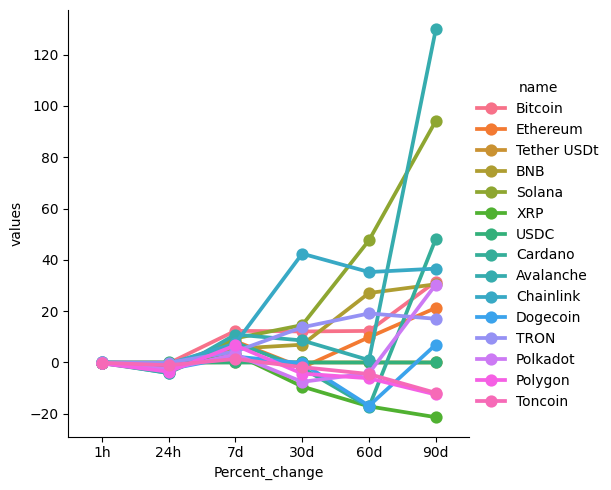

In [34]:
sns.catplot(x='Percent_change', y='values', hue='name', data=df7, kind='point')

In [50]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Toncoin'").head() # Looking at only Bitcoin
df10

,name,quote.USD.price,timestamp
14,Toncoin,2.07940,2024-02-12 05:38:46.104048
29,Toncoin,2.08055,2024-02-12 05:39:47.199878
44,Toncoin,2.08072,2024-02-12 05:40:48.490418
59,Toncoin,2.08081,2024-02-12 05:41:49.375148
74,Toncoin,2.08044,2024-02-12 05:42:50.061287


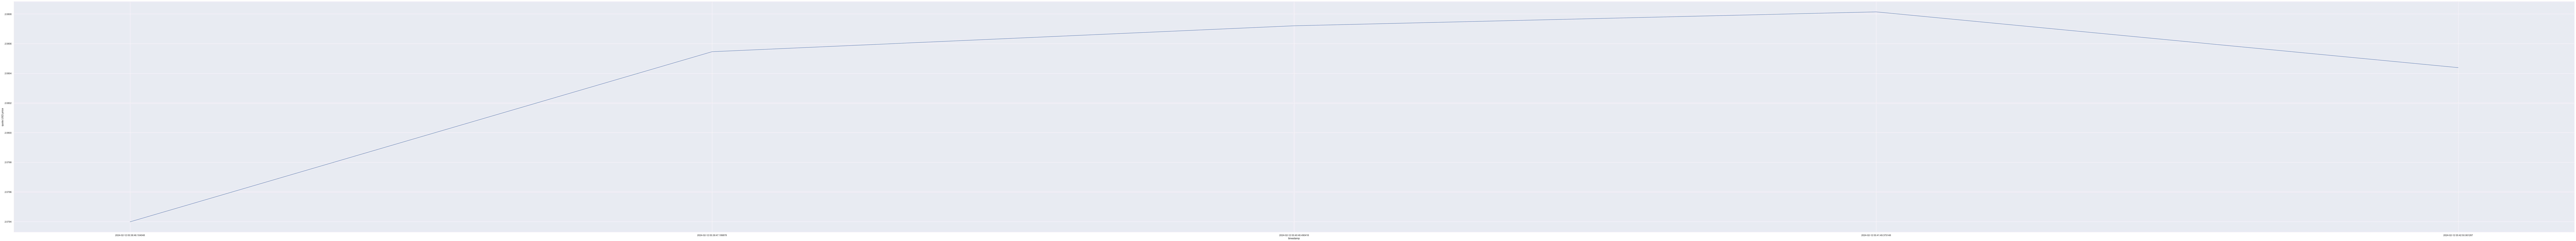

In [52]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price',data=df10)